# Mushroom Project

#### description
There is a dataset of different mushroom with their properties. Either each mush room can be poisonous, edible or unknown(classified as poisonous). The problem is to predict the mushroom is poisonous or edible according to it's properties.
Algorithm - Classification<br>
Data - https://raw.githubusercontent.com/sandespalakat/Datascience/c4d8008f9ab8cf0ffd91ac1e754a359210dd143e/Mushrooms-edibility/data/mushrooms.csv

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the csv data
mushroom_data = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/c4d8008f9ab8cf0ffd91ac1e754a359210dd143e/Mushrooms-edibility/data/mushrooms.csv")

In [3]:
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
mushroom_data = pd.DataFrame(mushroom_data)

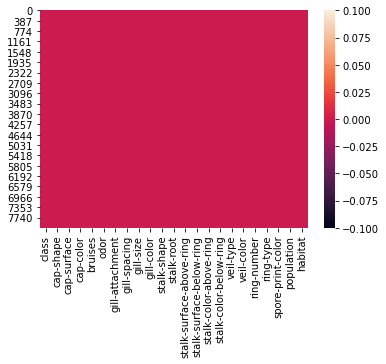

In [5]:
sns.heatmap(mushroom_data.isnull())

In [6]:
#no null values

#since all columns are classes, we have to apply label encoding 
mushroom_data = mushroom_data.apply(LabelEncoder().fit_transform)

In [7]:
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [8]:
mushroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


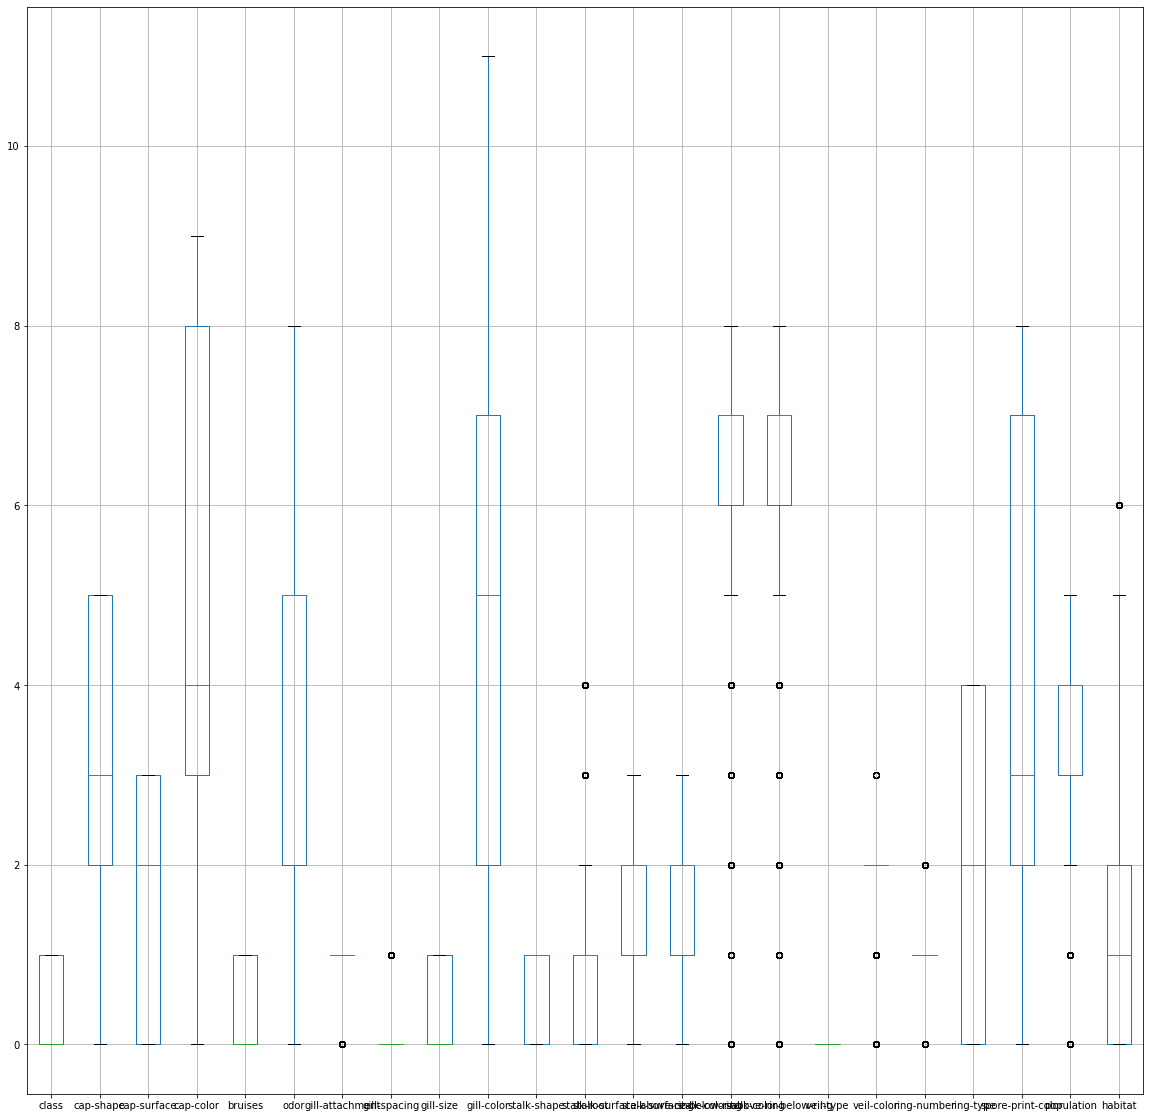

In [9]:
mushroom_data.boxplot(figsize=(20,20))

<Figure size 2160x2160 with 0 Axes>

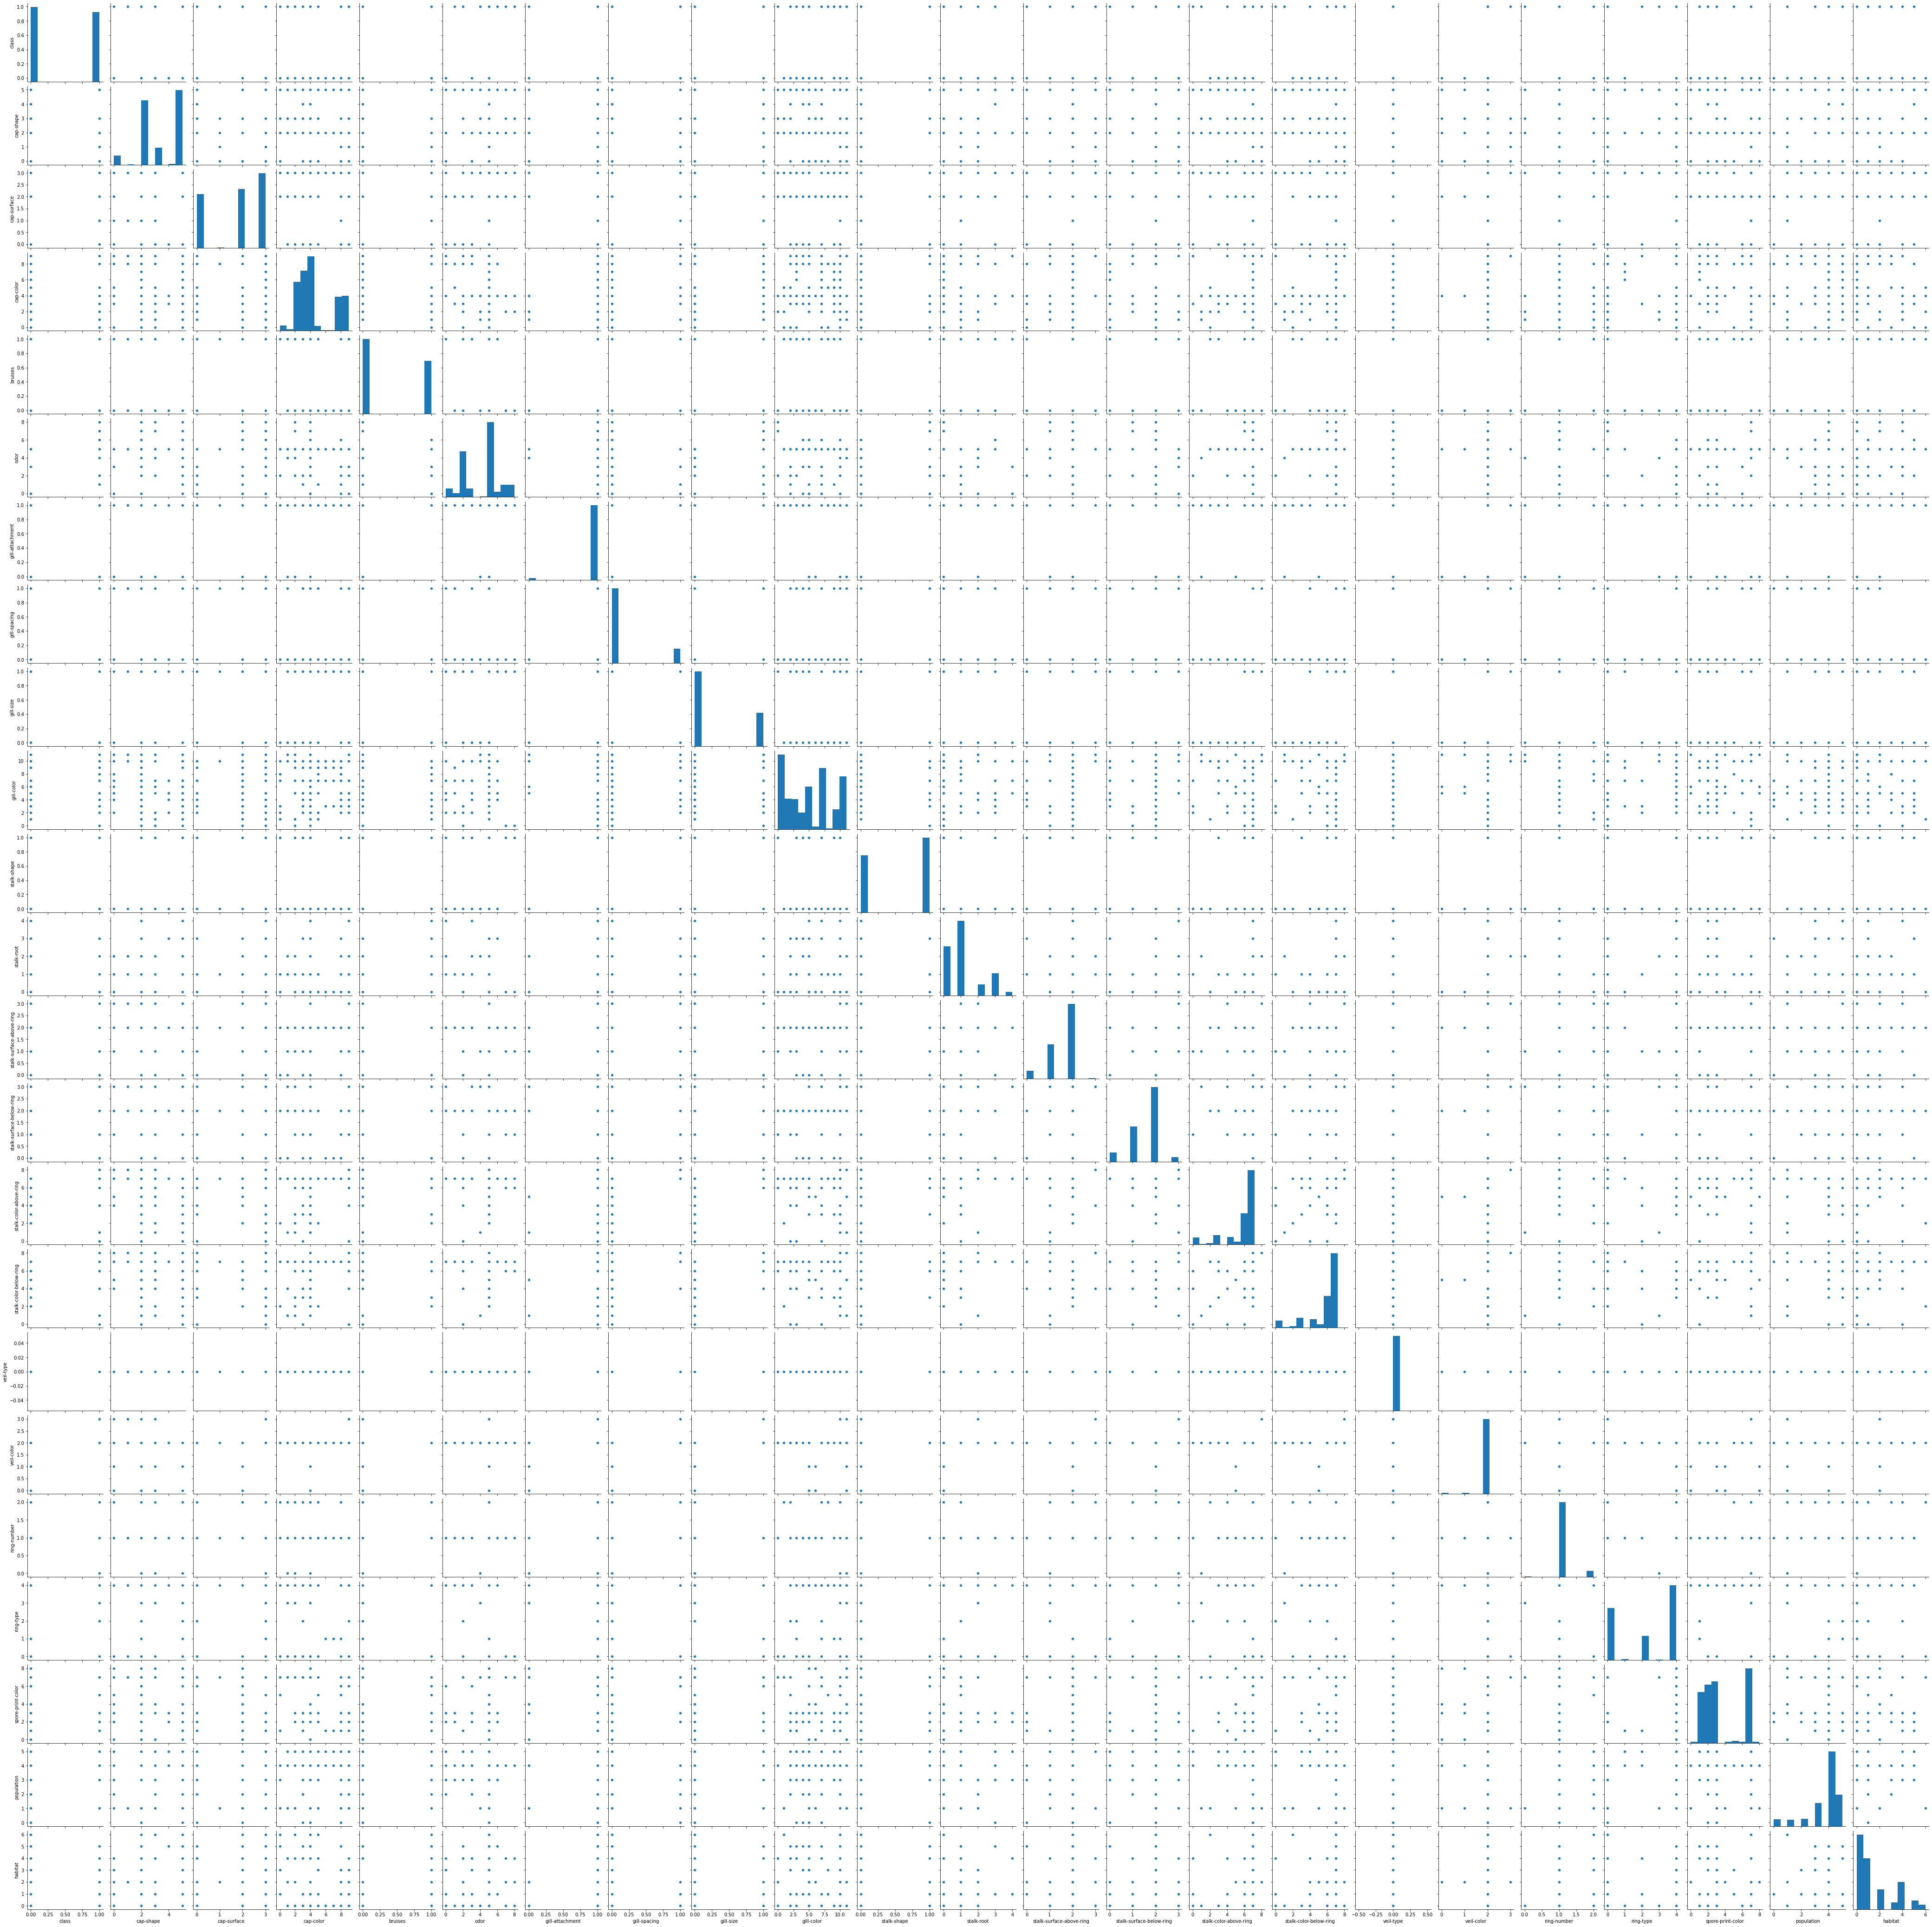

In [10]:
plt.figure(figsize=(30,30))
sns.pairplot(mushroom_data)


In [11]:
#not removing outliers because it causes data loss
#no missing values

In [12]:
x = mushroom_data.iloc[:,1:]

In [13]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [14]:
y = np.array(mushroom_data.iloc[:,0])

In [15]:
y.shape


(8124,)

In [16]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 21


In [17]:
#Found the best random state which is 21

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.22, random_state=21)

In [18]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
407,5,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,3,3,3
4040,5,0,3,0,2,1,0,0,7,0,...,1,6,6,0,2,1,2,1,5,0
2275,5,3,4,1,5,1,0,0,9,1,...,2,7,6,0,2,1,4,3,5,0
7252,3,2,2,0,8,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,0
441,5,3,8,1,3,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,5,3,9,1,3,1,0,0,5,0,...,3,7,7,0,2,1,4,3,3,4
772,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,3
5944,5,3,4,0,7,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,4
5327,2,0,3,0,2,1,0,0,2,0,...,1,4,0,0,2,1,2,1,4,1


<h4>Applying different algorithms</h4>

In [19]:
#logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predict = lr.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.9664429530201343
conf. matrix = [[890  34]
 [ 26 838]]
classi. report =               precision    recall  f1-score   support

           0       0.97      0.96      0.97       924
           1       0.96      0.97      0.97       864

    accuracy                           0.97      1788
   macro avg       0.97      0.97      0.97      1788
weighted avg       0.97      0.97      0.97      1788



In [20]:
#Decision tree
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)
predict = dtr.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 1.0
conf. matrix = [[924   0]
 [  0 864]]
classi. report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       864

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [21]:
#Support Vector Machine
svc = SVC()
svc.fit(x_train, y_train)
predict = svc.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.9893736017897091
conf. matrix = [[920   4]
 [ 15 849]]
classi. report =               precision    recall  f1-score   support

           0       0.98      1.00      0.99       924
           1       1.00      0.98      0.99       864

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



In [22]:
#KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.9983221476510067
conf. matrix = [[921   3]
 [  0 864]]
classi. report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       864

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [23]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = KNeighborsClassifier()
rf.fit(x_train, y_train)
predict = rf.predict(x_test)
print("accuracy score=", accuracy_score(y_test, predict))
print("conf. matrix =", confusion_matrix(y_test, predict))
print("classi. report =", classification_report(y_test, predict))

accuracy score= 0.9983221476510067
conf. matrix = [[921   3]
 [  0 864]]
classi. report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       864

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



<h4>Applying Cross Validation on each algorithm</h4>

In [24]:
#cross validation
from sklearn.model_selection import cross_val_score

In [25]:
#cross validation score for linear regression
lcv = cross_val_score(lr, x, y, cv=5)
print("Cross validation score for logistic regression=",lcv.mean())

Cross validation score for logistic regression= 0.8392256915498295


In [26]:
#cross validation score for descision tree
deccv = cross_val_score(dtr, x, y, cv=5)
print("Cross validation score for Descion tree =",deccv.mean())

Cross validation score for Descion tree = 0.9261229253505115


In [27]:
#cross validation score for SVM
svccv = cross_val_score(svc, x, y, cv=5)
print("Cross validation score for SVC=",svccv.mean())

Cross validation score for SVC= 0.841292231906025


In [28]:
#cross validation score for KNN
kncv = cross_val_score(knn, x, y, cv=5)
print("Cross validation score for KNN=",kncv.mean())

Cross validation score for KNN= 0.8815549071618036


In [29]:
#cross validation score for randomforest
rfcv = cross_val_score(rf, x, y, cv=5)
print("Cross validation score for randomforest = ",rfcv.mean())

Cross validation score for randomforest =  0.8815549071618036


<h6>Finding the best algorithm</h6>

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>


<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
    <th>CV Accuracy</th>
     <th>Difference</th>
  </tr>
  <tr>
    <td>Logistic regression</td>
    <td>0.966</td>
    <td>0.839</td>
      <td>0.127</td>
  </tr>
  <tr style="color:green;">
    <td>Decision tree</td>
    <td>1</td>
    <td>0.926</td>
      <td> 0.074</td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>0.989</td>
    <td>0.841</td>
      <td>0.148</td>
  </tr>
    <tr>
    <td>KNN</td>
    <td>0.999</td>
    <td>0.881</td>
      <td>0.118</td>
  </tr>
    <tr>
    <td>Random Forest</td>
    <td>0.998</td>
    <td>0.881</td>
      <td>0.117</td>
  </tr>
</table>

</body>
</html>

In [30]:
#Decision tree is the best Algorithm

<h4>Hyper parameter tuning</h4>

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameters = {'max_depth' : np.arange(2, 15),
             'criterion' : ['gini', 'entropy']}

In [33]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [34]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [35]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [36]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [37]:
accuracy_score(y_test, GCV_predict)

1.0

In [38]:
import joblib

In [39]:
joblib.dump(GCV.best_estimator_, "MushroomModel.pkl")

['MushroomModel.pkl']